<a href="https://colab.research.google.com/github/sebasArana/Trabajo-Parcial-AAI/blob/main/AAI_TP_P5_Representation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [114]:
import random
import numpy as np
import math
import seaborn as sns
import networkx as nx
import itertools

In [115]:
ry = 100
rx = 100
n = 11

p = [(random.randint(0,rx),random.randint(0,ry)) for i in range(n)]

In [116]:
def distance(a, b):
  x1 = a[0]
  x2 = b[0]
  y1 = a[1]
  y2 = b[1]
  return math.sqrt((x2-x1)**2+(y2-y1)**2)

In [117]:
mat = []
for i in range(n):
  row = []
  for j in range(0,n):
    if (i==j):
      row.append(0.)
    else:
      row.append(distance(p[i], p[j]))
  mat.append(row)

In [118]:
# mat

In [119]:
samples = """{0 3 6 7 10 4 1 0 2 5 9 8 0}
{0 8 9 6 3 0 7 10 4 1 2 5 0}
{0 1 2 3 4 5 6 7 8 9 10 0 0}
{0 6 3 7 10 4 1 0 2 5 9 8 0}
{0 6 9 8 3 0 7 10 4 1 2 5 0}"""

samples = [ [ int(i) for i in line[1:-1].split()] for line in samples.splitlines() ]
samples

[[0, 3, 6, 7, 10, 4, 1, 0, 2, 5, 9, 8, 0],
 [0, 8, 9, 6, 3, 0, 7, 10, 4, 1, 2, 5, 0],
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 0, 0],
 [0, 6, 3, 7, 10, 4, 1, 0, 2, 5, 9, 8, 0],
 [0, 6, 9, 8, 3, 0, 7, 10, 4, 1, 2, 5, 0]]

In [120]:
selected_sample =  samples[random.randint(0, len(samples) - 1) ][::]
print(selected_sample)
selected_sample.count(0)

[0, 6, 3, 7, 10, 4, 1, 0, 2, 5, 9, 8, 0]


3

In [121]:
nv = selected_sample.count(0) -1
selected_sample =  samples[random.randint(0, len(samples) - 1) ][::]
print(selected_sample)

routes_sample =[[0,] for i in range(nv) ]

iv = 0
for i in selected_sample[1:-1]:
    if i == 0:
        routes_sample[iv].append(0)
        iv += 1
        continue
    routes_sample[iv].append(i)

routes_sample

[0, 6, 3, 7, 10, 4, 1, 0, 2, 5, 9, 8, 0]


[[0, 6, 3, 7, 10, 4, 1, 0], [0, 2, 5, 9, 8]]

Graph has 11 nodes with 11 edges
Representación de: [0, 6, 3, 7, 10, 4, 1, 0, 2, 5, 9, 8, 0]


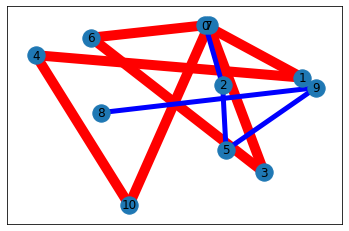

In [126]:
G=nx.Graph(name="VRP")

routes = routes_sample[::]

edges = []
for r in routes:
    route_edges = [(r[n],r[n+1]) for n in range(len(r)-1)]
    G.add_nodes_from(r)
    G.add_edges_from(route_edges)
    edges.append(route_edges)

print("Graph has %d nodes with %d edges" %(G.number_of_nodes(),    
G.number_of_edges()))

# pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos=p)
nx.draw_networkx_labels(G,pos=p)
colors = ['r', 'b', 'y']
linewidths = [10, 5]
for ctr, edgelist in enumerate(edges):
    nx.draw_networkx_edges(G,pos=p,edgelist=edgelist,edge_color = colors[ctr], width=linewidths[ctr])
    # nx.draw_networkx_edges(G,pos=p,edgelist=edgelist,edge_color = colors[ctr])

print("Representación de:", selected_sample)